<a href="https://colab.research.google.com/github/sayantikag98/Depression_Analysis/blob/master/Depression_analysis_from_tweets_(Model_Building).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk    ### nltk library

In [2]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [3]:
import pandas as pd                ### reading data file
df_combined=pd.read_csv('drive/My Drive/pre_final1.csv',parse_dates=['date'],encoding='utf-8')

In [4]:
df_combined

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentences,text_tokenized,stemming_stopwordsRemoved,lemmatized_stopwordsRemoved
0,2020-08-14 23:40:49,DalrympleWill,HearaichHerald,2,0,3,Andrew do send me a copy! Love to read it,NaN,NaN,NaN,1294418731251138562,https://twitter.com/DalrympleWill/status/12944...,Andrew do send me a copy! Love to read it,"['Andrew', 'do', 'send', 'me', 'a', 'copy', '!...",andrew send copi love read,andrew send copy love read
1,2020-08-14 23:29:59,lostboy54,ishkarnBHANDARI,10,85,403,This is all coming true. You were right @ishka...,NaN,@ishkarnBHANDARIhttps,NaN,1294416005674889216,https://twitter.com/lostboy54/status/129441600...,This is all coming true. You were right @ishka...,"['This', 'is', 'all', 'coming', 'true', '.', '...",come true right ishkarnbhandarihttp twitter co...,coming true right ishkarnbhandarihttps twitter...
2,2020-08-14 23:27:45,srijanpalsingh,NaN,3,34,151,Wishing everyone a very happy Independence Day...,NaN,NaN,#India #JaiHind #Kalam #IndependenceDay #Indep...,1294415445609472000,https://twitter.com/srijanpalsingh/status/1294...,Wishing everyone a very happy Independence Day...,"['Wishing', 'everyone', 'a', 'very', 'happy', ...",wish everyon happi independ day time gratitud ...,wishing everyone happy independence day time g...
3,2020-08-14 23:09:49,AAlHamoud7,NaN,0,0,7,"I don’t usually approach first, so when I do, ...",NaN,NaN,NaN,1294410930458173440,https://twitter.com/AAlHamoud7/status/12944109...,"I don’t usually approach first, so when I do, ...","['I', 'don', '’', 't', 'usually', 'approach', ...",usual approach first probabl special,usually approach first probably special
4,2020-08-14 22:21:57,MeerraChopra,NaN,28,19,278,#GunjanSaxena is such a brilliant film that ul...,NaN,@TripathiiPankaj,#GunjanSaxena #jhanvikapoor #sharansharma,1294398885654220800,https://twitter.com/MeerraChopra/status/129439...,#GunjanSaxena is such a brilliant film that ul...,"['#', 'GunjanSaxena', 'is', 'such', 'a', 'bril...",gunjansaxena brilliant film ull get adrenalin ...,gunjansaxena brilliant film ull get adrenaline...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266472,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000,"I stand corrected. there is, indeed, a vaccine...","['I', 'stand', 'corrected', '.', 'there', 'is'...",stand correct inde vaccin cervic cancer except...,stand corrected indeed vaccine cervical cancer...
266473,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845,#iWant! RT @24HoursLoot The Four Elements of a...,"['#', 'iWant', '!', 'RT', '@', '24HoursLoot', ...",iwant rt hoursloot four element human geek lif...,iwant rt hoursloot four element human geek lif...
266474,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030,there's a vaccine? don't think cancer can be v...,"['there', ""'s"", 'a', 'vaccine', '?', 'do', ""n'...",vaccin think cancer vaccin rt mizarcl anyon ta...,vaccine think cancer vaccinated rt mizarcle an...
266475,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620,#nowplaying gareth emery - exposure #awesomeness,"['#', 'nowplaying', 'gareth', 'emery', '-', 'e...",nowplay gareth emeri exposur awesom,nowplaying gareth emery exposure awesomeness


In [5]:
df_combined.shape[0]-df_combined.stemming_stopwordsRemoved.isna().sum()    ### to check for the number of non-null rows according to a particular column

266329

In [6]:
df_combined.lemmatized_stopwordsRemoved.isna().sum()    ### to check for the number of null rows

148

In [7]:
df_combined.dropna(subset=['stemming_stopwordsRemoved'],inplace=True)    ### to drop the rows containing null values

In [8]:
df_combined.reset_index(inplace=True,drop=True)    ### to reset index
df_combined

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentences,text_tokenized,stemming_stopwordsRemoved,lemmatized_stopwordsRemoved
0,2020-08-14 23:40:49,DalrympleWill,HearaichHerald,2,0,3,Andrew do send me a copy! Love to read it,NaN,NaN,NaN,1294418731251138562,https://twitter.com/DalrympleWill/status/12944...,Andrew do send me a copy! Love to read it,"['Andrew', 'do', 'send', 'me', 'a', 'copy', '!...",andrew send copi love read,andrew send copy love read
1,2020-08-14 23:29:59,lostboy54,ishkarnBHANDARI,10,85,403,This is all coming true. You were right @ishka...,NaN,@ishkarnBHANDARIhttps,NaN,1294416005674889216,https://twitter.com/lostboy54/status/129441600...,This is all coming true. You were right @ishka...,"['This', 'is', 'all', 'coming', 'true', '.', '...",come true right ishkarnbhandarihttp twitter co...,coming true right ishkarnbhandarihttps twitter...
2,2020-08-14 23:27:45,srijanpalsingh,NaN,3,34,151,Wishing everyone a very happy Independence Day...,NaN,NaN,#India #JaiHind #Kalam #IndependenceDay #Indep...,1294415445609472000,https://twitter.com/srijanpalsingh/status/1294...,Wishing everyone a very happy Independence Day...,"['Wishing', 'everyone', 'a', 'very', 'happy', ...",wish everyon happi independ day time gratitud ...,wishing everyone happy independence day time g...
3,2020-08-14 23:09:49,AAlHamoud7,NaN,0,0,7,"I don’t usually approach first, so when I do, ...",NaN,NaN,NaN,1294410930458173440,https://twitter.com/AAlHamoud7/status/12944109...,"I don’t usually approach first, so when I do, ...","['I', 'don', '’', 't', 'usually', 'approach', ...",usual approach first probabl special,usually approach first probably special
4,2020-08-14 22:21:57,MeerraChopra,NaN,28,19,278,#GunjanSaxena is such a brilliant film that ul...,NaN,@TripathiiPankaj,#GunjanSaxena #jhanvikapoor #sharansharma,1294398885654220800,https://twitter.com/MeerraChopra/status/129439...,#GunjanSaxena is such a brilliant film that ul...,"['#', 'GunjanSaxena', 'is', 'such', 'a', 'bril...",gunjansaxena brilliant film ull get adrenalin ...,gunjansaxena brilliant film ull get adrenaline...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266324,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000,"I stand corrected. there is, indeed, a vaccine...","['I', 'stand', 'corrected', '.', 'there', 'is'...",stand correct inde vaccin cervic cancer except...,stand corrected indeed vaccine cervical cancer...
266325,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845,#iWant! RT @24HoursLoot The Four Elements of a...,"['#', 'iWant', '!', 'RT', '@', '24HoursLoot', ...",iwant rt hoursloot four element human geek lif...,iwant rt hoursloot four element human geek lif...
266326,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030,there's a vaccine? don't think cancer can be v...,"['there', ""'s"", 'a', 'vaccine', '?', 'do', ""n'...",vaccin think cancer vaccin rt mizarcl anyon ta...,vaccine think cancer vaccinated rt mizarcle an...
266327,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620,#nowplaying gareth emery - exposure #awesomeness,"['#', 'nowplaying', 'gareth', 'emery', '-', 'e...",nowplay gareth emeri exposur awesom,nowplaying gareth emery exposure awesomeness


In [9]:
df_combined.stemming_stopwordsRemoved.isna().sum()     ### final check on null value rows

0

In [10]:
df_combined.lemmatized_stopwordsRemoved.isna().sum()

0

In [11]:
sentences=df_combined.stemming_stopwordsRemoved.tolist()     ### to convert a particular column into a list

In [12]:
sentences1=df_combined.lemmatized_stopwordsRemoved.tolist()

# **BAG OF WORDS**

In [13]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(max_features=2500)
# X1=cv.fit_transform(sentences).toarray()   ### for stemming
# X1   ### array of features

In [14]:
# print(cv.get_feature_names())  ### to get the feature names      ###### for stemming
# print(cv.get_params())

In [15]:
# print(cv.vocabulary_)

In [16]:
# df_bow=pd.DataFrame(X1,columns=cv.get_feature_names())
# df_bow

In [17]:
# X1_1=cv.fit_transform(sentences1).toarray()    ### for lemmatization
# X1_1

In [18]:
# print(cv.get_feature_names())  ### for lemmatization

In [19]:
# X1.shape

# **TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY**

In [20]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf=TfidfVectorizer(max_features=1000)
# X2=tfidf.fit_transform(sentences).toarray()     ### for stemming
# X2   ### array of features

In [21]:
# print(tfidf.get_feature_names())   ### to get the feature names

In [22]:
# X2_1=tfidf.fit_transform(sentences1).toarray()    ### lemmatization
# X2_1

In [23]:
# print(tfidf.get_feature_names())

# **WORD2VEC**

In [24]:
from gensim.models import Word2Vec    ## Word Embedding
import re
from nltk.corpus import stopwords

In [25]:
senten=[]

In [26]:
for i in range(len(df_combined.text)):
  words=re.sub("[^A-Za-z]"," ",df_combined.text[i])   ### to remove characters other than A-Z and a-z
  words=words.lower()         ### to convert to lower case
  senten.append(words)

In [27]:
senten_1=[]

for i in range(len(senten)):
  words=[]
  for word in senten[i].split():
    if (word not in set (stopwords.words('english'))):    ### to remove stopwords
      words.append(word)
  senten_1.append(list(words))


In [28]:
nltk.word_tokenize(senten[7])    ### word tokenize

['please', 'say', 'something', 'for', 'amaal', 'mallik', 'askshreya']

In [29]:
senten_1[7]

['please', 'say', 'something', 'amaal', 'mallik', 'askshreya']

In [30]:
df_combined.insert(13, "sentences_Modified", senten_1)
df_combined

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentences,sentences_Modified,text_tokenized,stemming_stopwordsRemoved,lemmatized_stopwordsRemoved
0,2020-08-14 23:40:49,DalrympleWill,HearaichHerald,2,0,3,Andrew do send me a copy! Love to read it,NaN,NaN,NaN,1294418731251138562,https://twitter.com/DalrympleWill/status/12944...,Andrew do send me a copy! Love to read it,"[andrew, send, copy, love, read]","['Andrew', 'do', 'send', 'me', 'a', 'copy', '!...",andrew send copi love read,andrew send copy love read
1,2020-08-14 23:29:59,lostboy54,ishkarnBHANDARI,10,85,403,This is all coming true. You were right @ishka...,NaN,@ishkarnBHANDARIhttps,NaN,1294416005674889216,https://twitter.com/lostboy54/status/129441600...,This is all coming true. You were right @ishka...,"[coming, true, right, ishkarnbhandarihttps, tw...","['This', 'is', 'all', 'coming', 'true', '.', '...",come true right ishkarnbhandarihttp twitter co...,coming true right ishkarnbhandarihttps twitter...
2,2020-08-14 23:27:45,srijanpalsingh,NaN,3,34,151,Wishing everyone a very happy Independence Day...,NaN,NaN,#India #JaiHind #Kalam #IndependenceDay #Indep...,1294415445609472000,https://twitter.com/srijanpalsingh/status/1294...,Wishing everyone a very happy Independence Day...,"[wishing, everyone, happy, independence, day, ...","['Wishing', 'everyone', 'a', 'very', 'happy', ...",wish everyon happi independ day time gratitud ...,wishing everyone happy independence day time g...
3,2020-08-14 23:09:49,AAlHamoud7,NaN,0,0,7,"I don’t usually approach first, so when I do, ...",NaN,NaN,NaN,1294410930458173440,https://twitter.com/AAlHamoud7/status/12944109...,"I don’t usually approach first, so when I do, ...","[usually, approach, first, probably, special]","['I', 'don', '’', 't', 'usually', 'approach', ...",usual approach first probabl special,usually approach first probably special
4,2020-08-14 22:21:57,MeerraChopra,NaN,28,19,278,#GunjanSaxena is such a brilliant film that ul...,NaN,@TripathiiPankaj,#GunjanSaxena #jhanvikapoor #sharansharma,1294398885654220800,https://twitter.com/MeerraChopra/status/129439...,#GunjanSaxena is such a brilliant film that ul...,"[gunjansaxena, brilliant, film, ull, get, adre...","['#', 'GunjanSaxena', 'is', 'such', 'a', 'bril...",gunjansaxena brilliant film ull get adrenalin ...,gunjansaxena brilliant film ull get adrenaline...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266324,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000,"I stand corrected. there is, indeed, a vaccine...","[stand, corrected, indeed, vaccine, cervical, ...","['I', 'stand', 'corrected', '.', 'there', 'is'...",stand correct inde vaccin cervic cancer except...,stand corrected indeed vaccine cervical cancer...
266325,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845,#iWant! RT @24HoursLoot The Four Elements of a...,"[iwant, rt, hoursloot, four, elements, human, ...","['#', 'iWant', '!', 'RT', '@', '24HoursLoot', ...",iwant rt hoursloot four element human geek lif...,iwant rt hoursloot four element human geek lif...
266326,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030,there's a vaccine? don't think cancer can be v...,"[vaccine, think, cancer, vaccinated, rt, mizar...","['there', ""'s"", 'a', 'vaccine', '?', 'do', ""n'...",vaccin think cancer vaccin rt mizarcl anyon ta...,vaccine think cancer vaccinated rt mizarcle an...
266327,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620,#nowplaying gareth emery - exposure #awesome

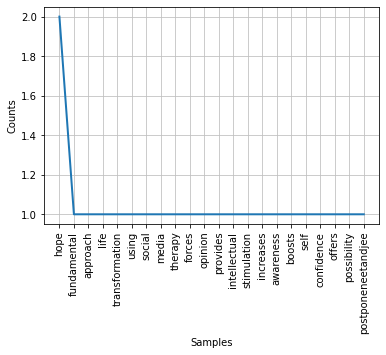

In [31]:
count_plot=nltk.FreqDist(senten_1[900])

count_plot.plot()

In [32]:
## Training the Word2Vec model
model=Word2Vec(senten_1,min_count=1) ### min_count kept 1 so that no word is ignored

In [33]:
print(model) ## to print the summary of the model

Word2Vec(vocab=252218, size=100, alpha=0.025)


In [34]:
word=list(model.wv.vocab)   ### to print the summary of the vocab
word[0]

'andrew'

In [35]:
X = model[model.wv.vocab]   ### feature representation matrix
X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(252218, 100)

In [36]:
#for i,val in enumerate(word):
df_word2vec=pd.DataFrame(X)


In [37]:
df_word2vec.insert(0,'Vocab_name',word)
df_word2vec.set_index('Vocab_name') 
df_word2vec=df_word2vec.transpose(copy=False) 
df_word2vec.columns = df_word2vec.iloc[0]
df_word2vec = df_word2vec[1:]
df_word2vec




Vocab_name,andrew,send,copy,love,read,coming,true,right,ishkarnbhandarihttps,twitter,com,ishkarnbhandari,status,wishing,everyone,happy,independence,day,time,gratitude,got,us,proud,made,possible,india,thrive,independent,nation,jaihind,kalam,independenceday,august,pic,sbtfbrfooc,usually,approach,first,probably,special,...,oocytes,vericose,mercplus,manyoo,kelli,kelis,pigtails,exclaimed,wotd,naruhodo,biprorshee,bipples,buhahaha,mikhail,journalismromance,gtalkers,footlong,iphonefresh,afleck,thanksforthereminder,amex,socialexperiment,notsponsoredbygilette,seeekritly,howtopissoffwhitepeople,gossipmongering,boybashing,somebodykeeelhim,latereaction,netrey,espirit,feeshy,wazaaaaaaaaaaaa,bumbolatty,coconatty,thekasarupesh,faacking,fooked,curhdj,fireblade
0,-0.0277769,0.176839,-0.822323,-0.231476,-1.09432,-0.593212,0.0175803,-0.345221,0.0180311,0.158812,1.51894,0.0732748,2.25636,-1.22142,-1.81549,-1.66511,0.144143,-1.41065,-0.285344,-0.191596,-1.77707,-0.294024,-0.429205,-1.51284,0.310361,1.76525,-0.0463316,0.229862,1.26789,0.248065,-0.0553235,-0.13407,0.0421725,0.904236,-0.000192608,-0.939949,0.0744501,-1.56541,-1.06167,-0.564844,...,-0.00995251,-0.00338865,-0.0201439,-0.0106377,-0.0162732,-0.0168111,0.00144172,0.00240645,-0.0152652,-0.011038,-0.0062565,-0.00828392,-0.000591261,-0.00797288,-0.00244242,-0.000839556,-0.00518756,0.00176809,-0.00406176,0.0050472,-0.00605644,0.0126213,0.00323554,0.000941067,-0.00226695,0.00175506,-0.0153388,-0.0106924,-0.00781007,0.0019577,-0.00652454,-0.012726,-0.0054945,-0.0150566,-0.0236982,-0.00426268,-0.0092878,-0.0196918,-0.00530352,-0.00675607
1,-0.250087,0.093448,0.0715826,-0.700638,0.22949,0.83762,-0.955159,0.971266,0.0063771,-3.28319,-1.25718,-0.112172,-6.27217,-1.8848,-0.0158039,-3.3009,-0.847261,-0.845892,0.524779,-0.391265,1.60227,-0.0532657,-1.84428,-0.401614,-0.176744,-1.23494,-0.255974,-0.228196,-0.761837,-0.797954,0.0502229,-0.279502,0.310597,-2.57238,0.00882382,-0.184024,-0.347414,-0.889433,-0.0365563,0.564558,...,-0.0123577,-0.00881835,-0.0167138,0.00546857,-0.0235965,-0.0391252,-0.00822701,-0.00448549,-0.00312842,-0.00201699,-0.0247763,-0.0609623,-0.0302359,-0.0258875,-0.0041201,0.00917436,-0.00150918,-0.0114908,-0.0140758,-0.013789,-0.0310486,-0.0105044,-0.0145967,-0.0121922,-0.0095152,-0.00885192,-0.01336,-0.0209203,-0.00952284,-0.0298275,-0.00680047,-0.00556499,-0.00825537,-0.0330614,-0.0405949,-0.00187782,-0.0073121,-0.00867448,-0.0320375,0.00480649
2,-0.0880312,0.282912,0.169687,2.752,-0.713699,0.487735,1.14406,-0.997954,-0.00393097,-0.650379,-3.58396,-0.0298411,-2.68306,1.26807,0.0523531,1.13643,-1.34285,-2.32713,-0.0807245,0.434031,-0.509946,0.368576,-0.917264,-1.50494,-0.318088,-1.32971,0.0967666,-0.608308,-1.34507,0.163764,-0.18086,-0.12149,-0.440155,-0.492591,-0.0143163,0.0415294,-0.140894,-0.850023,-0.166328,-1.06129,...,0.0142719,0.00915594,0.00445142,0.0029977,0.0243941,0.0050714,0.00219536,-0.0113788,0.00287549,-0.00218226,0.0166122,0.0134979,0.00321669,0.00795932,-0.0185045,0.00520944,0.00166977,0.0084072,0.00171443,0.00141268,0.00538519,0.00376296,-0.00370538,0.00174441,-0.00348226,-0.000451995,0.00427681,0.00141894,0.00572766,0.00231503,-0.00501904,0.00646568,0.000164028,0.00442013,-0.0145387,0.0180067,-0.00286237,0.0063936,0.0183609,-0.0131097
3,0.127827,-1.47179,-0.308274,-0.223875,0.316001,-1.00989,0.570426,0.438917,0.0218405,-0.992967,2.19616,0.0516364,3.1569,-0.342181,-1.82103,-1.52057,-0.182473,-3.21358,-1.51977,-0.418707,-0.73211,-4.14466,-0.903299,-0.86634,-1.34493,1.16718,-0.0571752,0.0189074,-0.680414,-0.239185,-0.266851,-0.160323,-0.0123814,0.242275,0.00341368,-0.465278,-0.179581,-0.562907,-0.173914,-1.61299,...,-0.00247588,-0.000726709,-0.0045777,0.0159573,0.0140115,-0.00695149,-0.0034577,-0.00363656,-0.00574374,-0.0119291,-0.00181106,-0.00627584,-0.000648997,0.00614853,0.00546664,-0.00390919,0.00758943,0.0030864,0.00538504,-0.00193373,0.00943942,0.00226616,0.000782511,0.000753949,0.00551326,0.00782034,-0.00116935,-0.00279864,-0.000200256,-0.0138164,0.00616116,

In [38]:
df_word2vec['read']

0       -1.09432
1        0.22949
2      -0.713699
3       0.316001
4       0.344688
         ...    
95       -0.2007
96       1.31641
97      -1.11955
98     -0.945374
99   -0.00338854
Name: read, Length: 100, dtype: object

In [39]:
## to find the vector for a particular word
vector=model['depression']
vector

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-0.3881858 , -0.02480574, -0.02192747, -0.23995546,  0.84881043,
       -0.40929466,  0.19443966, -0.14522605, -0.54180115, -0.26339784,
       -0.11948755,  0.36732307,  0.40501785, -0.39898106,  0.31367975,
       -0.16415691,  0.97770905,  0.8603503 , -0.08417332,  0.19974871,
        0.8575926 , -0.7720136 ,  0.12568322,  0.09196255, -0.5155333 ,
        0.11038345, -0.13796084, -0.48792905, -0.21447553, -0.49606082,
        0.19814995,  0.03896255, -0.344325  ,  0.63316345,  0.5527681 ,
       -0.29333392, -0.44408208,  0.89982444,  0.9964574 , -0.39863926,
       -0.07330284, -0.44021356, -0.27940091,  0.65985024, -0.14510092,
        0.24137825,  0.34263363,  0.5312732 ,  0.32408285, -0.43866956,
        0.14948198, -0.66407883,  0.31419826, -0.63942266, -0.48522165,
        0.40399933,  0.30559894, -0.08585352, -0.5195735 ,  0.2711088 ,
       -0.4252905 , -0.7766732 , -0.50185573,  0.7665471 ,  0.19904889,
       -0.30830678,  0.55914336,  0.15566939, -0.08430108, -0.71

In [40]:
model.wv.save_word2vec_format('model.txt',binary=False) ## to save the model

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [41]:
## to find similar words to the words commonly used by people in depression in their tweets
keyword = ["depression","depressed","anxiety","overwhelmed","exhausted","distressed","anxious","tired","low","discouraged","desperate","insomnia","cry","nervous","worried","lonely","sad","empty"]

### word "demotivated" is not there in the dictionary
import warnings
warnings.filterwarnings("ignore")
similar=[]
for i in keyword:
  similar.append(model.wv.most_similar(i))


In [42]:
### to merge all the similar words into one list
import itertools 

merged = list(itertools.chain.from_iterable(similar))
mergedList=list(set (merged))
print(len(mergedList))

180


In [43]:
### to visualize the word vectors using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# to fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df_pca=pd.DataFrame({'pca_component_1':result[:,0],'pca_component_2':result[:,1]})
df_pca


Explained variation per principal component: [0.36561227 0.12315211]


,pca_component_1,pca_component_2
0,1.002744,0.971271
1,5.025335,-1.969170
2,3.240083,0.891123
3,5.999135,1.859920
4,5.697479,-2.270709
...,...,...
252213,-0.235244,-0.092679
252214,-0.189871,-0.088854
252215,-0.190481,-0.077864
252216,-0.238987,-0.098279


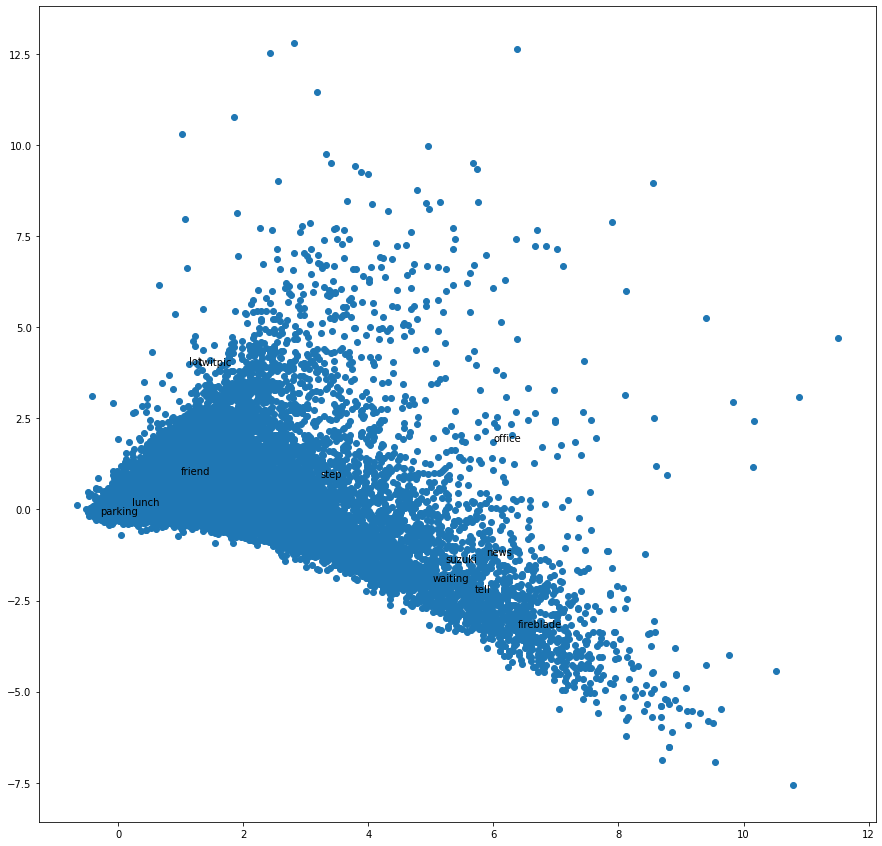

In [44]:
# create a scatter plot of the projection
plt.figure(figsize=(15,15))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# **FOR MODEL BUILDING USED A DATASET FROM THE BELOW REFERENCED GITHUB REPOSITORY**

---


It is a labelled dataset containing tweets and their corresponding labels

Reference: [Github Link](https://github.com/viritaromero/Detecting-Depression-in-Tweets.git)

In [45]:
df_modelTrain=pd.read_csv('drive/My Drive/sentiment_tweets3.csv',encoding='utf-8')

In [46]:
df_modelTrain=df_modelTrain.iloc[:10313,1:]

In [47]:
# df_modelTrain['message'] = df_modelTrain['message'].sample(frac=1).reset_index(drop=True)

In [48]:
import sklearn.utils
df_modelTrain = sklearn.utils.shuffle(df_modelTrain,random_state=100)     ### to shuffle the dataset
df_modelTrain = df_modelTrain.reset_index(drop=True)


In [49]:
df_modelTrain.head(10)

,message,label
0,@MaryWilhite Very nice presentation! Perhaps ...,0
1,@officialTila Hey girl doin big things. Got r...,0
2,#BeingAdoptedMeans I have struggled with depre...,1
3,@scottarthart i know!! im pretty good at it a...,0
4,"In High School,"" the Kids Are Not All Right """"...",1
5,@SQLChicken because it's programmed differently,0
6,@TheXiaxue PS: It's only a theory based on my ...,0
7,How exercising can slash the risk of depressio...,1
8,@FlorenceKincaid he was...he said it.look on a...,0
9,Bom dia twittes!,0


# **Text Preprocessing**

In [50]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()                   

###Lemmatization is the process of grouping together the different inflected 
### forms of a word so they can be analysed as a single item.(Ref:GeeksForGeeks)

In [51]:
model_sen1=[]
for i in range(len(df_modelTrain.message)):
  words=re.sub("[^A-Za-z]"," ",df_modelTrain.message[i])   ### to remove characters other than A-Z and a-z
  words=words.lower()     ### to turn to lower case
  model_sen1.append(words)

In [52]:
model_sen2=[]

for i in range(len(model_sen1)):
  words=[]
  for word in model_sen1[i].split():
    if (word not in set (stopwords.words('english'))):  #### to remove stopwords
      words.append(lemmatizer.lemmatize(word))           ###lemmatization
  model_sen2.append(list(words))
  model_sen2[i]=" ".join(model_sen2[i])


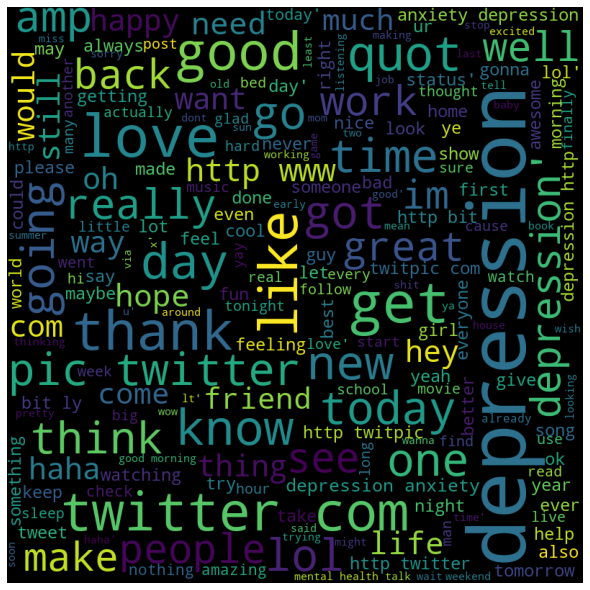

In [53]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,   ### to plot wordcloud
                background_color ='black', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(str(model_sen2))   ## for the whole dataset
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 
  

In [54]:
df_modelTrain.insert(1,'text_Cleaned',model_sen2)

In [55]:
df_modelTrain = df_modelTrain[df_modelTrain.text_Cleaned != ""]
 

In [56]:
df_modelTrain.reset_index(inplace=True,drop=True)

In [57]:
df_modelTrain

,message,text_Cleaned,label
0,@MaryWilhite Very nice presentation! Perhaps ...,marywilhite nice presentation perhaps use pers...,0
1,@officialTila Hey girl doin big things. Got r...,officialtila hey girl doin big thing got respe...,0
2,#BeingAdoptedMeans I have struggled with depre...,beingadoptedmeans struggled depression entire ...,1
3,@scottarthart i know!! im pretty good at it a...,scottarthart know im pretty good arent,0
4,"In High School,"" the Kids Are Not All Right """"...",high school kid right social academic pressure...,1
...,...,...,...
10302,Hope everyone is having a SWELL day,hope everyone swell day,0
10303,"Happy Birthday to my Grandpa. He has 3 cats, ...",happy birthday grandpa cat still love,0
10304,Antidepressant of The Day#Depression #Joy #Ant...,antidepressant day depression joy antidepressa...,1
10305,more bits from the email: You are one of about...,bit email one picked thousand entry better good,0


In [58]:
y=df_modelTrain['label']

In [59]:
y.shape

(10307,)

In [60]:
X=df_modelTrain['text_Cleaned']

In [61]:
X.shape

(10307,)

In [62]:
import tensorflow as tf


In [63]:
tf.__version__

'2.3.0'

In [64]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras import regularizers

In [65]:
vocab_size=5000 ## vocabulary size

# **One Hot Representation**

In [66]:
onehot=[one_hot(word,vocab_size) for word in df_modelTrain.text_Cleaned.tolist()]


In [67]:
length=[]
for i in range(len(onehot)):
  length.append(len(onehot[i]))
print(f"Maximum length is {sum(length)/len(length)}")
print(f"Minimum length is {min(length)}")


Maximum length is 9.50140681090521
Minimum length is 1


# **Embedding Representation**

In [68]:
sentenceLength=20
embeddingSentences=pad_sequences(onehot,padding='pre',maxlen=sentenceLength)
print(embeddingSentences.shape)


(10307, 20)


# **Creation of the model**

In [69]:
embeddingVectorFeature=10
model=Sequential()
model.add(Embedding(vocab_size,embeddingVectorFeature,input_length=sentenceLength))
# model.add(Conv1D(128,3, padding="valid", activation="relu", strides=3))
# model.add(GlobalMaxPooling1D())
# model.add(Flatten())

model.add(LSTM(10))
model.add(Dense(5,activation="relu",kernel_regularizer=regularizers.l2(0.003)))   ### l2 regularization and dropout layer to reduce overfitting
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

In [70]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 10)            50000     
_________________________________________________________________
lstm (LSTM)                  (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 5)                 55        
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 12        
Total params: 50,907
Trainable params: 50,907
Non-trainable params: 0
_________________________________________________________________


In [72]:
import numpy as np

X=np.array(embeddingSentences)
y=np.array(y)

In [73]:
X.shape

(10307, 20)

In [74]:
y.shape

(10307,)

# **Train-test split**

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=101)

## **Model Training, plotting and prediction**

Epoch 1/10
207/207 [==============================] - 2s 8ms/step - loss: 0.7073 - accuracy: 0.4780 - val_loss: 0.7013 - val_accuracy: 0.2280
Epoch 2/10
207/207 [==============================] - 1s 6ms/step - loss: 0.6981 - accuracy: 0.5335 - val_loss: 0.6958 - val_accuracy: 0.2268
Epoch 3/10
207/207 [==============================] - 1s 6ms/step - loss: 0.6947 - accuracy: 0.7157 - val_loss: 0.6939 - val_accuracy: 0.7738
Epoch 4/10
207/207 [==============================] - 1s 6ms/step - loss: 0.6936 - accuracy: 0.7764 - val_loss: 0.6933 - val_accuracy: 0.7738
Epoch 5/10
207/207 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.7764 - val_loss: 0.6932 - val_accuracy: 0.7738
Epoch 6/10
207/207 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.7764 - val_loss: 0.6932 - val_accuracy: 0.7738
Epoch 7/10
207/207 [==============================] - 1s 6ms/step - loss: 0.6931 - accuracy: 0.7764 - val_loss: 0.6931 - val_accuracy: 0.7738
Epoch 

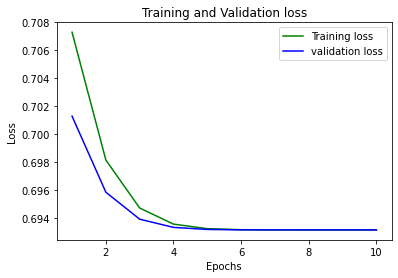

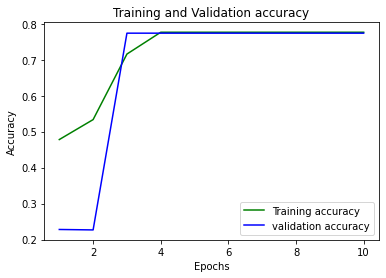

65/65 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.7769


[0.693146824836731, 0.7769156098365784]

In [76]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,train_size=0.8)
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10)
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
  
loss_train1 = history.history['accuracy']
loss_val1 = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train1, 'g', label='Training accuracy')
plt.plot(epochs, loss_val1, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.evaluate(X_test,y_test)


# **CLASSIFICATION MODELS**

*  *RANDOM FOREST CLASSIFIER*
*   *MULTINOMIAL NB*
*   *PASSIVE AGGRESSIVE CLASSIFIER* 








In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

In [78]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold

# **CLASSIFICATION METRICS**

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [80]:
# kf = KFold(n_splits=2,shuffle=True)   ### K-fold cross-validation
# for train, test in kf.split(X,y):
#   X_train=X[train]
#   X_test=X[test]
#   y_train=y[train]
#   y_test=y[test]

# **REPEATED K-FOLD CROSS-VALIDATION**

In [81]:
random_state = 100
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)    ### repeated k-fold cross-validation
rfc=RandomForestClassifier()
mnb=MultinomialNB()
pac=PassiveAggressiveClassifier()
classifierList=[rfc,mnb,pac]
y_predList=[]
scoreList=[]
confusion_matrixList=[]
accuracy_scoreList=[]
precision_scoreList=[]
recall_scoreList=[]
f1_scoreList=[]
aurocList=[]


for i in classifierList:
  for train, test in rkf.split(X,y):
    X_train=X[train]
    X_test=X[test]
    y_train=y[train]
    y_test=y[test]
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    y_predList.append(y_pred)
    scoreList.append(i.score(X_test,y_test))#### mean accuracy score
    confusion_matrixList.append(confusion_matrix(y_test,y_pred))
    accuracy_scoreList.append(accuracy_score(y_test,y_pred))
    precision_scoreList.append(precision_score(y_test,y_pred))
    recall_scoreList.append(recall_score(y_test,y_pred))
    f1_scoreList.append(f1_score(y_test,y_pred))
    aurocList.append(roc_auc_score(y_test,y_pred))

name=['Random_Forest','Random_Forest','Random_Forest','Random_Forest','Multinomial_NB','Multinomial_NB','Multinomial_NB','Multinomial_NB',
      'Passive_Aggressive_Classifier','Passive_Aggressive_Classifier','Passive_Aggressive_Classifier','Passive_Aggressive_Classifier']

splits=['First_split','Second_split','First_split','Second_split','First_split','Second_split','First_split','Second_split',
        'First_split','Second_split','First_split','Second_split']

repeats=['First_repeat','First_repeat','Second_repeat','Second_repeat','First_repeat','First_repeat','Second_repeat','Second_repeat',
         'First_repeat','First_repeat','Second_repeat','Second_repeat']

d=pd.DataFrame({'name_of_classifier':name,'no_of_repeats':repeats,'no_of_splits':splits,'prediction':y_predList,'score':scoreList,'confusion_matrix':confusion_matrixList,'accuracy_score':accuracy_scoreList,
                'precision_score':precision_scoreList,'recall_score':recall_scoreList,'f1_score':f1_scoreList,
                'AUROC_score':aurocList})






# **RESULT TABLE**

# the result table sorted by f1_score

# Random Forest classifier turns out to be the best among the three according to f1 score

In [82]:
d.sort_values(by='f1_score',inplace=True,ascending=False)   
d.reset_index(drop=True,inplace=True)
d

,name_of_classifier,no_of_repeats,no_of_splits,prediction,score,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,AUROC_score
0,Random_Forest,Second_repeat,Second_split,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.884339,"[[3917, 61], [535, 640]]",0.884339,0.912981,0.544681,0.682303,0.764673
1,Random_Forest,First_repeat,Second_split,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.884921,"[[3970, 66], [527, 590]]",0.884921,0.899390,0.528201,0.665539,0.755924
2,Random_Forest,First_repeat,First_split,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0.875825,"[[3894, 69], [571, 620]]",0.875825,0.899855,0.520571,0.659574,0.751580
3,Random_Forest,Second_repeat,First_split,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0.879511,"[[3952, 69], [552, 581]]",0.879511,0.893846,0.512798,0.651711,0.747819
4,Multinomial_NB,First_repeat,First_split,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0.818005,"[[3599, 364], [574, 617]]",0.818005,0.628950,0.518052,0.568140,0.713101
5,Multinomial_NB,Second_repeat,Second_split,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.816806,"[[3594, 384], [560, 615]]",0.816806,0.615616,0.523404,0.565777,0.713437
6,Multinomial_NB,First_repeat,Second_split,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.825733,"[[3686, 350], [548, 569]]",0.825733,0.619151,0.509400,0.558939,0.711340
7,Multinomial_NB,Second_repeat,First_split,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0.824990,"[[3683, 338], [564, 569]]",0.824990,0.627343,0.502207,0.557843,0.709074
8,Passive_Aggressive_Classifier,Second_repeat,Second_split,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.836600,"[[3861, 117], [725, 450]]",0.836600,0.793651,0.382979,0.516648,0.676783
9,Passive_Aggressive_Classifier,First_repeat,First_split,"[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, ...",0.484478,"[[1659, 2304], [353, 838]]",0.484478,0.266709,0.703610,0.386799,0.561116
